In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
df = pd.read_csv('agri1.1.csv', index_col = 0)

In [3]:
df.head()

,Area,PH,Season,Crop,Yield Goal,N,P,K,Cow_Dung,Poultry_Manure
0,Thakurgra,3.8-5.5,Rabi,Boro Rice,7.5,150,65,65,0,0.0
1,Thakurgra,3.8-5.5,Rabi,Wheat,4.5,120,30,60,0,0.0
2,Thakurgra,3.8-5.5,Rabi,Wheat,4.5,120,30,60,0,0.0
3,Thakurgra,3.8-5.5,Rabi,Potato,30.0,135,30,90,5,3.0
4,Thakurgra,3.8-5.5,Rabi,Marize,10.0,255,75,80,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 705
Data columns (total 10 columns):
Area              706 non-null object
PH                706 non-null object
Season            706 non-null object
Crop              706 non-null object
Yield Goal        706 non-null float64
N                 706 non-null int64
P                 706 non-null int64
K                 706 non-null int64
Cow_Dung          706 non-null int64
Poultry_Manure    697 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 60.7+ KB


In [5]:
df['Poultry_Manure'].isnull().values.any()

True

In [6]:
df['Poultry_Manure'].value_counts()

0.0    554
3.0    143
Name: Poultry_Manure, dtype: int64

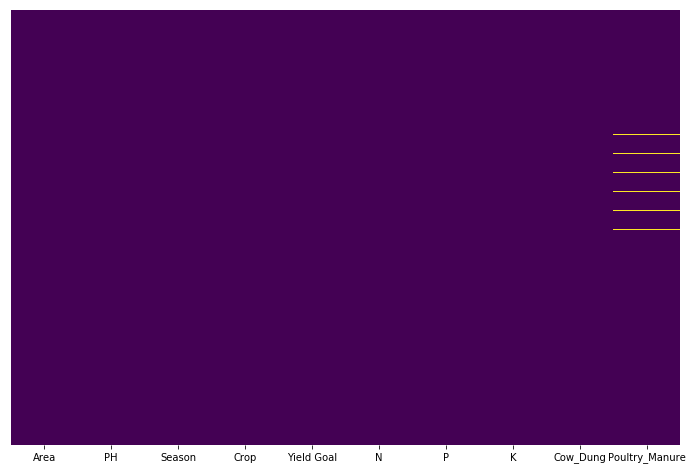

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [8]:
df['Poultry_Manure'] = df['Poultry_Manure'].fillna(0.0)

# df = df.fillna(df['Poultry_Manure'].mean())

In [9]:
df['Poultry_Manure'].value_counts()

0.0    563
3.0    143
Name: Poultry_Manure, dtype: int64

In [10]:
df.head()

,Area,PH,Season,Crop,Yield Goal,N,P,K,Cow_Dung,Poultry_Manure
0,Thakurgra,3.8-5.5,Rabi,Boro Rice,7.5,150,65,65,0,0.0
1,Thakurgra,3.8-5.5,Rabi,Wheat,4.5,120,30,60,0,0.0
2,Thakurgra,3.8-5.5,Rabi,Wheat,4.5,120,30,60,0,0.0
3,Thakurgra,3.8-5.5,Rabi,Potato,30.0,135,30,90,5,3.0
4,Thakurgra,3.8-5.5,Rabi,Marize,10.0,255,75,80,0,0.0


In [59]:
print(df['Area'].value_counts())

print(df['PH'].value_counts())

print(df['Season'].value_counts())

print(df['Crop'].value_counts())

print(df['Cow_Dung'].value_counts())

0     72
13    62
7     61
12    55
11    55
9     55
6     55
5     55
3     55
2     55
10    41
4     31
14    24
8     21
1      9
Name: Area, dtype: int64
0    310
3    144
4     83
7     41
5     41
2     24
1     24
6     21
8     18
Name: PH, dtype: int64
3    287
1    191
2    180
4     39
0      9
Name: Season, dtype: int64
17    142
6     111
14     58
8      51
1      50
21     49
18     42
9      34
16     26
15     24
3      24
4      24
10     19
13     13
2      11
0       9
11      7
12      4
7       3
5       3
20      1
19      1
Name: Crop, dtype: int64
0    554
5    152
Name: Cow_Dung, dtype: int64


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
df['Area'] = le.fit_transform(df['Area'])

In [15]:
df['PH'] = le.fit_transform(df['PH'])
df['Season'] = le.fit_transform(df['Season'])
df['Crop'] = le.fit_transform(df['Crop'])

In [16]:
df.head()

,Area,PH,Season,Crop,Yield Goal,N,P,K,Cow_Dung,Poultry_Manure
0,14,1,3,1,7.5,150,65,65,0,0.0
1,14,1,3,21,4.5,120,30,60,0,0.0
2,14,1,3,21,4.5,120,30,60,0,0.0
3,14,1,3,14,30.0,135,30,90,5,3.0
4,14,1,3,9,10.0,255,75,80,0,0.0


In [17]:
df['PH'].value_counts()

0    310
3    144
4     83
7     41
5     41
2     24
1     24
6     21
8     18
Name: PH, dtype: int64

In [36]:
X = df.iloc[:, [3,4,5,6,7]].values
y = df.iloc[:, -2].values
y1= df.iloc[:, -1].values

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y1, test_size = 0.2, random_state = 0)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc = StandardScaler()

In [40]:
x_train = sc.fit_transform(x_train)
x_train1 = sc.fit_transform(x_train1)

x_test  = sc.transform(x_test) 
x_test1  = sc.transform(x_test1) 

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lg = LogisticRegression()
lg1 = LogisticRegression()

In [43]:
lg.fit(x_train, y_train)
lg1.fit(x_train1, y_train1)

C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
y_predict = lg.predict(x_test)
y_predict1 = lg1.predict(x_test1)

In [45]:
print(round(accuracy_score(y_test, y_predict) * 100, 3))
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

print(round(accuracy_score(y_test1, y_predict1) * 100, 3))
print(confusion_matrix(y_test1, y_predict1))
print(classification_report(y_test1, y_predict1))

86.62
[[103   4]
 [ 15  20]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       107
           5       0.83      0.57      0.68        35

   micro avg       0.87      0.87      0.87       142
   macro avg       0.85      0.77      0.80       142
weighted avg       0.86      0.87      0.86       142

81.69
[[105   4]
 [ 22  11]]
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89       109
         3.0       0.73      0.33      0.46        33

   micro avg       0.82      0.82      0.82       142
   macro avg       0.78      0.65      0.67       142
weighted avg       0.81      0.82      0.79       142



In [46]:
from sklearn.svm import SVC

In [47]:
svc = SVC()
svc1 = SVC()

In [48]:
svc.fit(x_train, y_train)
svc1.fit(x_train1, y_train1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [49]:
svc_pred = svc.predict(x_test)
svc_pred1 = svc1.predict(x_test1)

In [50]:
print(round(accuracy_score(y_test, svc_pred) * 100, 3))
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

print(round(accuracy_score(y_test1, svc_pred1) * 100, 3))
print(confusion_matrix(y_test1, svc_pred1))
print(classification_report(y_test1, svc_pred1))

98.592
[[107   0]
 [  2  33]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       107
           5       1.00      0.94      0.97        35

   micro avg       0.99      0.99      0.99       142
   macro avg       0.99      0.97      0.98       142
weighted avg       0.99      0.99      0.99       142

97.183
[[109   0]
 [  4  29]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       109
         3.0       1.00      0.88      0.94        33

   micro avg       0.97      0.97      0.97       142
   macro avg       0.98      0.94      0.96       142
weighted avg       0.97      0.97      0.97       142



In [51]:
result = pd.DataFrame({
    'actual(cow_dung)': y_test,
    'machine predict(cow_dung)' : y_predict,
    'actual(Poultry_Manure)': y_test1,
    'machine predict(Poultry_Manure)' : y_predict1
})

In [52]:
result.head(20)

,actual(cow_dung),machine predict(cow_dung),actual(Poultry_Manure),machine predict(Poultry_Manure)
0,0,0,0.0,0.0
1,0,0,0.0,0.0
2,0,0,0.0,0.0
3,5,0,3.0,0.0
4,0,0,0.0,0.0
5,0,0,0.0,0.0
6,5,5,3.0,0.0
7,0,5,0.0,3.0
8,0,0,0.0,0.0
9,5,5,3.0,0.0


In [53]:
result1 = pd.DataFrame({
    'actual(cow_dung)': y_test,
    'machine predict(cow_dung)' : svc_pred,
    'actual(Poultry_Manure)': y_test1,
    'machine predict(Poultry_Manure)' : svc_pred1
})

In [54]:
result1.head(20)

,actual(cow_dung),machine predict(cow_dung),actual(Poultry_Manure),machine predict(Poultry_Manure)
0,0,0,0.0,0.0
1,0,0,0.0,0.0
2,0,0,0.0,0.0
3,5,5,3.0,3.0
4,0,0,0.0,0.0
5,0,0,0.0,0.0
6,5,5,3.0,3.0
7,0,0,0.0,0.0
8,0,0,0.0,0.0
9,5,5,3.0,3.0


In [55]:
# ----------------------------------
# svc has given the best result
# ---------------------------------

In [58]:
svc1.predict(sc.inverse_transform(np.array([[14, 30.0, 135, 30, 90]])))

array([0.])